[![Commits since latest release][gh-image]][gh-link]

[gh-link]: https://github.com/claudioperez/elle-0002/compare/v0.0.0...master
[gh-image]: https://img.shields.io/github/commits-since/claudioperez/elle-0002/v0.0.0?style=social

In [2]:
import anon
anon.conf.config.update('jax_disable_jit', True)
anon.conf.config.update("jax_enable_x64", True)
import anon.atom as anp
import elle.sections
import elle.beam2d
import anabel as em
geom_template = elle.beam2d.transform_no2(elle.beam2d.geom_no2)
beam_template = elle.beam2d.resp_no1

An `Assembler` is an object with an `.assemble()` and optionally a `.compose()` method

In [3]:
# Create a model Assembler
model = em.SkeletalModel(ndm=2,ndf=3)

# Define problem parameters
ColumnE  = model.param("ColumnE")
GirderE  = model.param("GirderE")
P1 = model.param("P1")

# Define model components
girder_section = em.aisc.load("w33x130")
column_section = em.aisc.load("w14x159")
basic_girder  = beam_template(**girder_section, E=GirderE)
basic_column  = beam_template(**column_section, E=ColumnE)

girder = geom_template(basic_girder)
column = geom_template(basic_column)

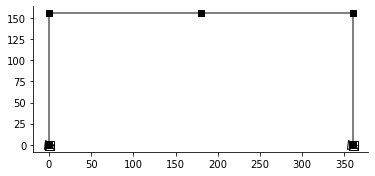

In [4]:
# Set up nodes
ft = 12
B, H = 30.*ft, 13.*ft
model.node("1",  0.,  0.)
model.node("2",  0.,  H )
model.node("3", B/2,  H )
model.node("4",  B ,  H )
model.node("5",  B ,  0.)

model.beam("a", "1", "2", **column_section, elem=column)
model.beam("b", "2", "3", **girder_section, elem=girder)
model.beam("c", "3", "4", **girder_section, elem=girder)
model.beam("d", "4", "5", **column_section, elem=column)

model.boun("1", [1,1,1])
model.boun("5", [1,1,1])

model.load("2", P1, dof="x")
model.load("2", -2e3, dof="y")
model.load("4", -2e3, dof="y")

em.plot_skeletal(model);

In [5]:
f = model.compose()

In [6]:
f(3600.,3600.,2e3)

/home/claudio/elle/numeric/elle/numeric/inverse.py:111: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


DeviceArray([[   0.28355172],
             [ 171.74283748],
             [   0.84689206],
             [-202.66515683],
             [-149.92389898],
             [   5.04060219],
             [ -14.82161937],
             [-148.43045677],
             [   5.1556104 ]], dtype=float64)

/home/claudio/elle/numeric/elle/numeric/inverse.py:111: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


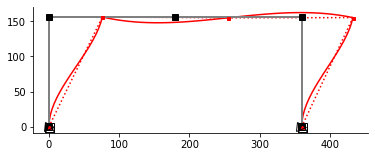

In [7]:
fig, ax = em.plot_displ(model, f(29e6,29e6,20e3),scale=1e3)

In [7]:
df = anon.diff.jacfwd(f, None, (0,1),squeeze=False)

In [8]:
df(29e6,29e6,20e3)

dx: Traced<ConcreteArray([[20000.]
 [-2000.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [    0.]
 [-2000.]
 [    0.]])>with<JVPTrace(level=2/0)>
  with primal = DeviceArray([[20000.],
                             [-2000.],
                             [    0.],
                             [    0.],
                             [    0.],
                             [    0.],
                             [    0.],
                             [-2000.],
                             [    0.]], dtype=float64)
       tangent = Traced<ShapedArray(float64[9,1])>with<BatchTrace(level=1/0)>
                   with val = DeviceArray([[[-0.],
                                            [-0.]],
                              
                                           [[-0.],
                                            [-0.]],
                              
                                           [[-0.],
                                            [-0.]],
                              
          

/home/claudio/elle/numeric/elle/numeric/inverse.py:112: UserWarning: Function inversion failed to converge.
  warnings.warn("Function inversion failed to converge.")


(DeviceArray([[-2.04476205e-09],
              [-1.10382234e-11],
              [ 7.00882848e-13],
              [-2.04415680e-09],
              [-5.35148746e-12],
              [-2.71208496e-13],
              [-2.04355123e-09],
              [ 2.30895445e-11],
              [ 9.53551267e-13]], dtype=float64),
 DeviceArray([[-5.79214813e-10],
              [ 9.60734398e-13],
              [ 7.15495715e-12],
              [-5.24811184e-10],
              [ 3.78153916e-11],
              [-3.37652007e-12],
              [-4.70407107e-10],
              [-1.95779547e-12],
              [ 6.30254346e-12]], dtype=float64))